C:\Users\marmi\AppData\Local\Temp\ipykernel_12928\539522413.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = iris_df.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))


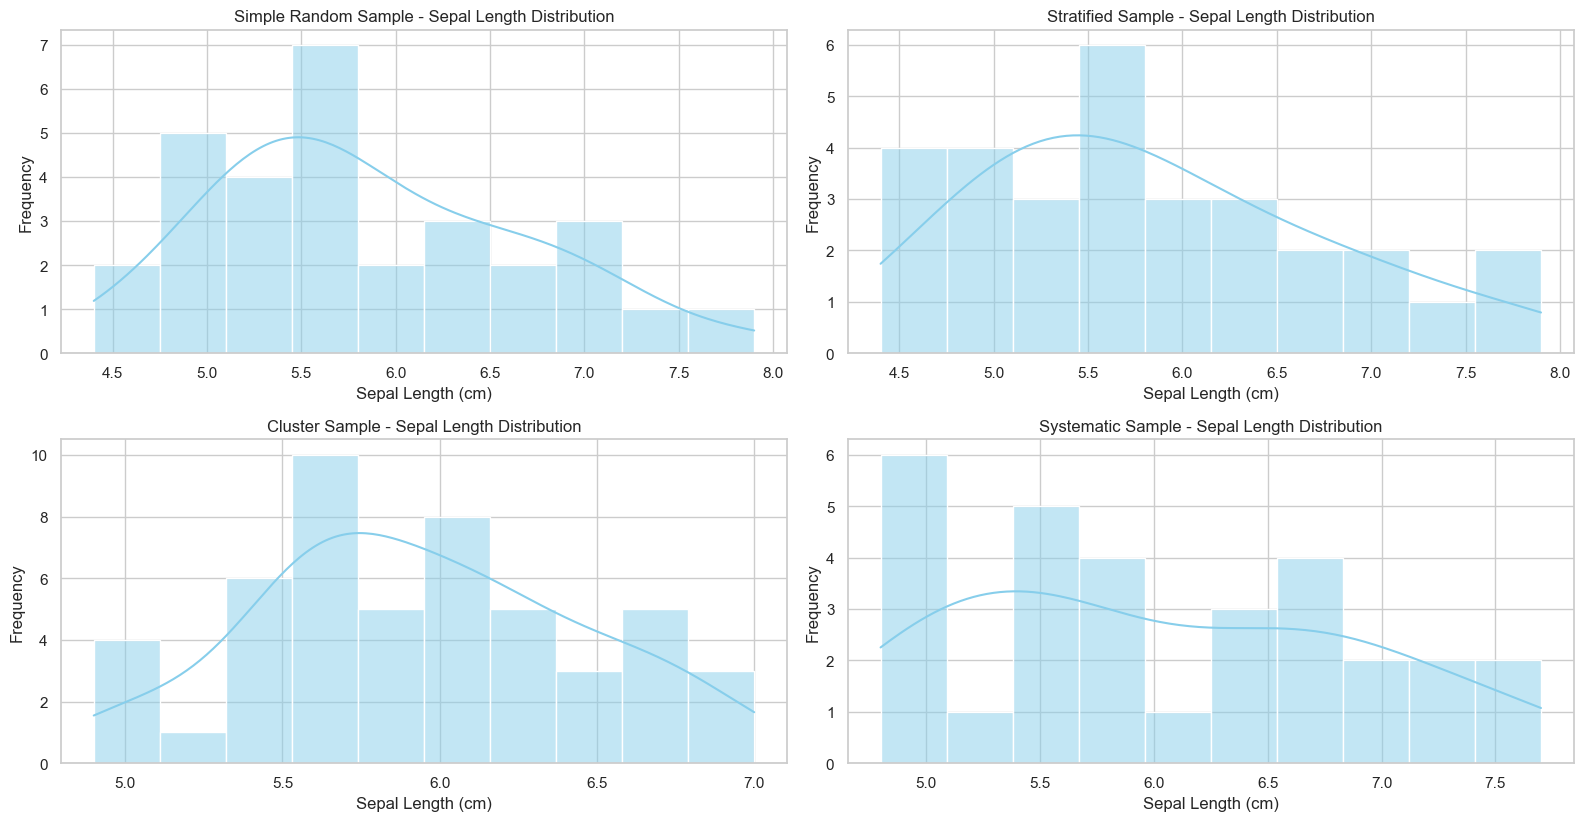

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['species'] = data.target

# 1. Simple Random Sampling (20% sample of the dataset)
simple_random_sample = iris_df.sample(frac=0.2, random_state=1)

# 2. Stratified Sampling (20% sample from each species)
stratified_sample = iris_df.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))

# 3. Cluster Sampling (Dividing into 3 clusters based on species and sampling from one cluster)
cluster_sample = iris_df[iris_df['species'] == 1]  # Selecting one cluster (species = 1)

# 4. Systematic Sampling (Selecting every 5th sample in the dataset)
systematic_sample = iris_df.iloc[::5]



# Set the figure size
plt.figure(figsize=(16, 12))
sns.set_theme(style="whitegrid")

# Visualize sepal length distribution for each sampling technique
sampling_methods = {
    "Simple Random Sample": simple_random_sample,
    "Stratified Sample": stratified_sample,
    "Cluster Sample": cluster_sample,
    "Systematic Sample": systematic_sample,

}

# Loop through each sampling technique and plot
for i, (method, sample_data) in enumerate(sampling_methods.items(), 1):
    plt.subplot(3, 2, i)
    sns.histplot(sample_data['sepal length (cm)'], kde=True, bins=10, color='skyblue')
    plt.title(f"{method} - Sepal Length Distribution")
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Measure of central Tendancy

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['species'] = data.target

# EDA - Measures of Central Tendency
central_tendency = {}
for column in iris_df.columns[:-1]:  # Skip 'species' for central tendency calculations
    mean = iris_df[column].mean()
    median = iris_df[column].median()
    mode = iris_df[column].mode()[0]  # Taking the first mode in case of multiple modes
    central_tendency[column] = {'Mean': mean, 'Median': median, 'Mode': mode}

# Display central tendency
central_tendency_df = pd.DataFrame(central_tendency).T
print("Measures of Central Tendency:")
print(central_tendency_df)

# Additional EDA - Checking for missing values
print("\nMissing Values:")
print(iris_df.isnull().sum())

# Feature Engineering - Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])  # Scale all features except 'species'
scaled_df = pd.DataFrame(scaled_features, columns=iris_df.columns[:-1])
scaled_df['species'] = iris_df['species']  # Add 'species' back for reference

# Feature Engineering - Encoding categorical variable (species)
iris_df['species_encoded'] = iris_df['species']  # Already numerical; just duplicating for clarity

print("\nScaled Feature Sample:")
print(scaled_df.head())

print("\nEncoded 'species' Sample:")
print(iris_df[['species', 'species_encoded']].head())


Measures of Central Tendency:
                       Mean  Median  Mode
sepal length (cm)  5.843333    5.80   5.0
sepal width (cm)   3.057333    3.00   3.0
petal length (cm)  3.758000    4.35   1.4
petal width (cm)   1.199333    1.30   0.2

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Scaled Feature Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Encoded 'species' Sample:
   species 

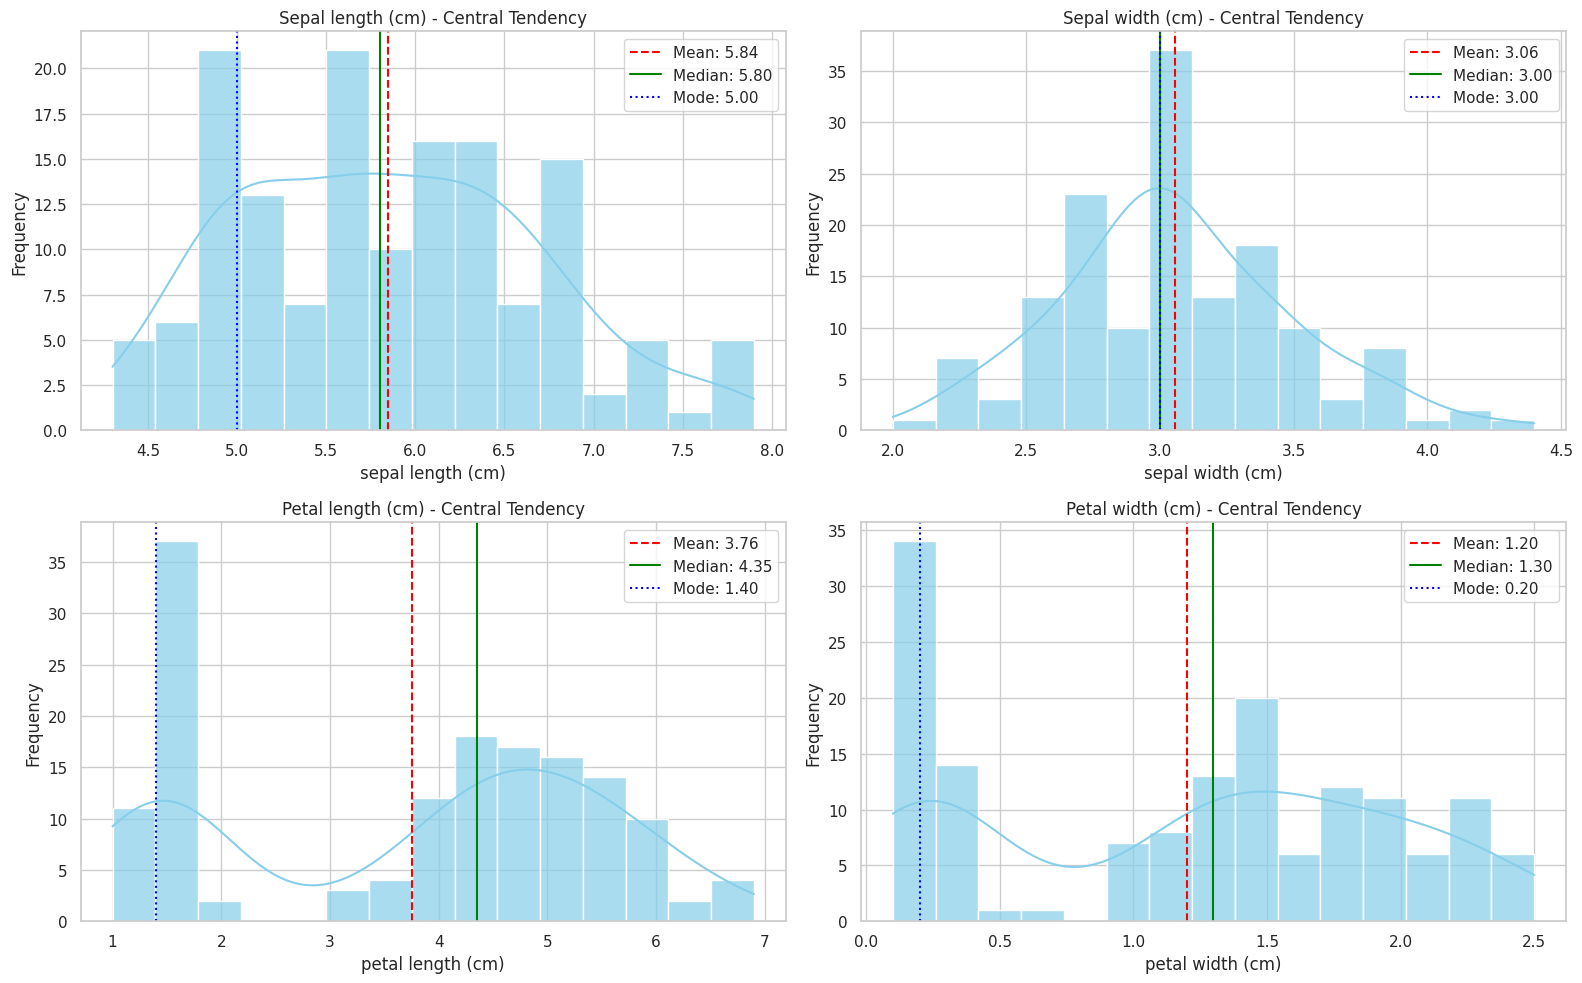

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['species'] = data.target

# Set up the plotting area for 4 features in a 2x2 layout
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Loop through each feature to plot histograms with mean, median, and mode
for i, column in enumerate(iris_df.columns[:-1], 1):  # Skip 'species' column for central tendency
    plt.subplot(2, 2, i)  # Set up a 2x2 grid layout
    sns.histplot(iris_df[column], bins=15, kde=True, color="skyblue", alpha=0.7)

    # Calculate mean, median, and mode
    mean = iris_df[column].mean()
    median = iris_df[column].median()
    mode = iris_df[column].mode()[0]  # First mode in case of multiple modes

    # Plot mean, median, and mode as vertical lines
    plt.axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='green', linestyle='-', label=f"Median: {median:.2f}")
    plt.axvline(mode, color='blue', linestyle=':', label=f"Mode: {mode:.2f}")

    plt.title(f'{column.capitalize()} - Central Tendency')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


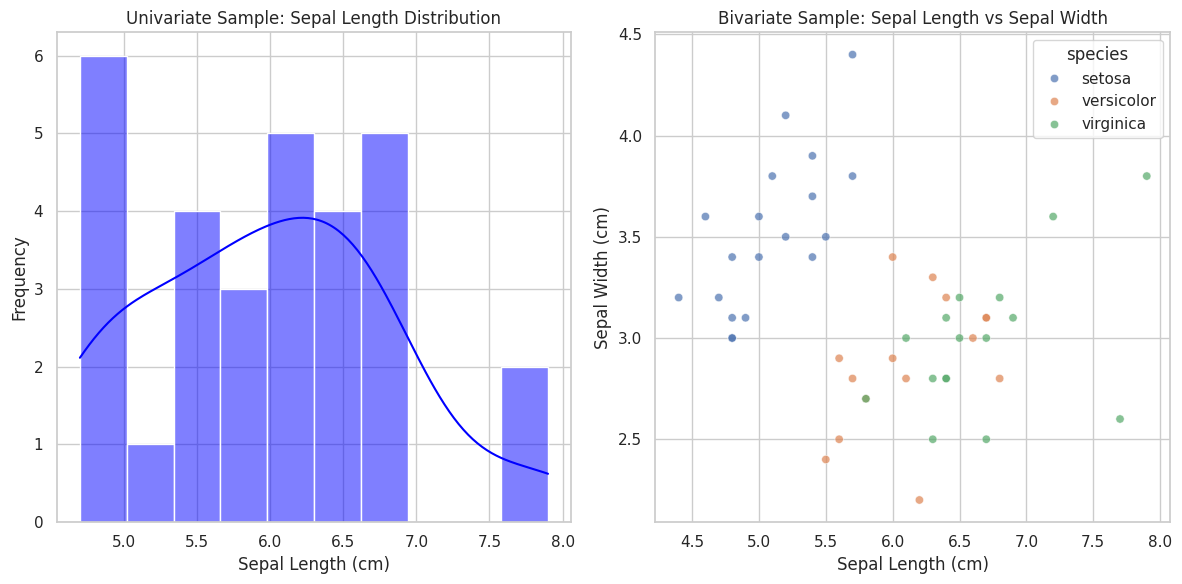

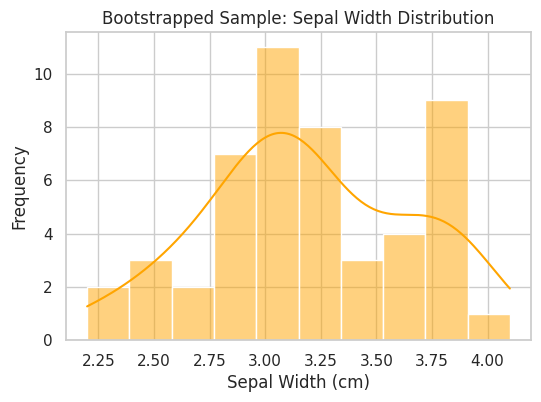

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.utils import resample

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows of the dataset
print("Iris Dataset:")
print(iris_df.head())

# Univariate Sampling (Sample sepal length)
univariate_sample = iris_df['sepal length (cm)'].sample(n=30, random_state=42)

# Bivariate Sampling (Sample sepal length and sepal width)
bivariate_sample = iris_df.sample(n=50, random_state=42)

# Re-sampling (Bootstrap)
bootstrapped_sample = resample(bivariate_sample, n_samples=50, random_state=42)

# Visualization
plt.figure(figsize=(12, 6))

# Univariate Sample Visualization
plt.subplot(1, 2, 1)
sns.histplot(univariate_sample, kde=True, color='blue', bins=10)
plt.title('Univariate Sample: Sepal Length Distribution')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Bivariate Sample Visualization
plt.subplot(1, 2, 2)
sns.scatterplot(data=bivariate_sample, x='sepal length (cm)', y='sepal width (cm)', hue='species', alpha=0.7)
plt.title('Bivariate Sample: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.tight_layout()
plt.show()

# Bootstrapped Sample Visualization
plt.figure(figsize=(6, 4))
sns.histplot(bootstrapped_sample['sepal width (cm)'], kde=True, color='orange', bins=10)
plt.title('Bootstrapped Sample: Sepal Width Distribution')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()


**Explanation of the Code**
  - Loading the Dataset: The Iris dataset is loaded using sklearn.datasets.load_iris(). The features are put into a Pandas DataFrame.
  - Univariate Sampling: A random sample of 30 sepal lengths is taken from the dataset.
  - Bivariate Sampling: A random sample of 50 flowers is taken, including both sepal length and sepal width.
  - Re-sampling: A bootstrap sample of 50 observations is created from the bivariate sample.

**Visualization**:
- The distribution of the univariate sample (sepal lengths) is visualized with a histogram.
- The relationship between sepal length and sepal width in the bivariate sample is visualized using a scatter plot, colored by species.
- The distribution of sepal width in the bootstrapped sample is visualized using a histogram.

1. Titanic Dataset
Description: Information about Titanic passengers, including demographics, survival status, and ticket class.
- Link: Titanic Dataset on Kaggle
- Columns: Age, Fare, Class, Sex, Embarked, and Survival status.
- Use Cases: Sampling based on survival class, analyzing central tendency of Age and Fare.
2. Wine Quality Dataset
- mDescription: Chemical composition and quality ratings for red and white wines.
- Link: Wine Quality Dataset on UCI Machine Learning Repository
- Columns: Fixed acidity, volatile acidity, citric acid, residual sugar, alcohol, pH, quality.
- Use Cases: Sampling wine quality levels, measuring central tendencies of acidity, sugar, and alcohol content.
3. House Prices (Ames Housing) Dataset
- Description: Detailed data on residential homes in Ames, Iowa, including house features and sale prices.
- Link: Ames Housing Dataset on Kaggle
- Columns: Lot size, living area, number of rooms, price, etc.
- Use Cases: Sampling by neighborhood or house type, measuring central tendencies for prices and room counts.
4. Adult Income Dataset
- Description: Data on income classification based on census data, with attributes like age, education, occupation, and income category.
- Link: Adult Income Dataset on UCI Machine Learning Repository
- Columns: Age, Work class, Education, Occupation, Income level (>50K or <=50K).
- Use Cases: Stratified sampling based on income or education, central tendencies of age and work hours.
5. Customer Segmentation Dataset (Mall Customers)
- Description: Data about mall customers, including their annual income, spending score, and age.
- Link: Mall Customers Dataset on Kaggle
- Columns: Age, Annual Income, Spending Score, Gender.
- Use Cases: Clustering customers by income or spending score, calculating mean and median income and age for targeted marketing.

Five number Summary

- Min
- First Quartile(Q1)
- Median(Q2)
- Third Quartile(Q3)
- max

In [ ]:
import pandas as pd

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows of the dataset
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Select numerical columns to calculate five-number summary
numerical_cols = ['Age', 'Fare']

# Calculate five-number summary
five_number_summary = titanic_df[numerical_cols].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print(five_number_summary)


        Age      Fare
min   0.420    0.0000
25%  20.125    7.9104
50%  28.000   14.4542
75%  38.000   31.0000
max  80.000  512.3292


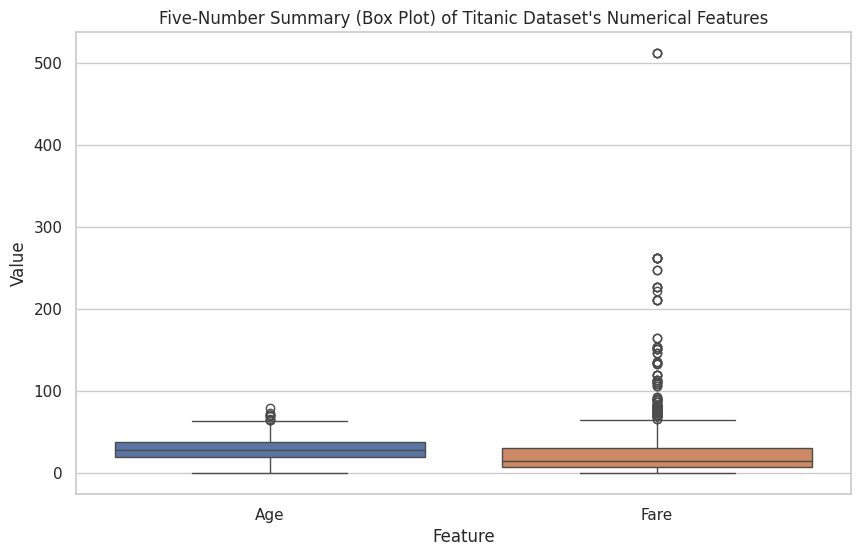

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(10, 6))

# Create box plots for each numerical column
sns.boxplot(data=titanic_df[numerical_cols])

# Add labels and title
plt.title("Five-Number Summary (Box Plot) of Titanic Dataset's Numerical Features")
plt.ylabel("Value")
plt.xlabel("Feature")

plt.show()


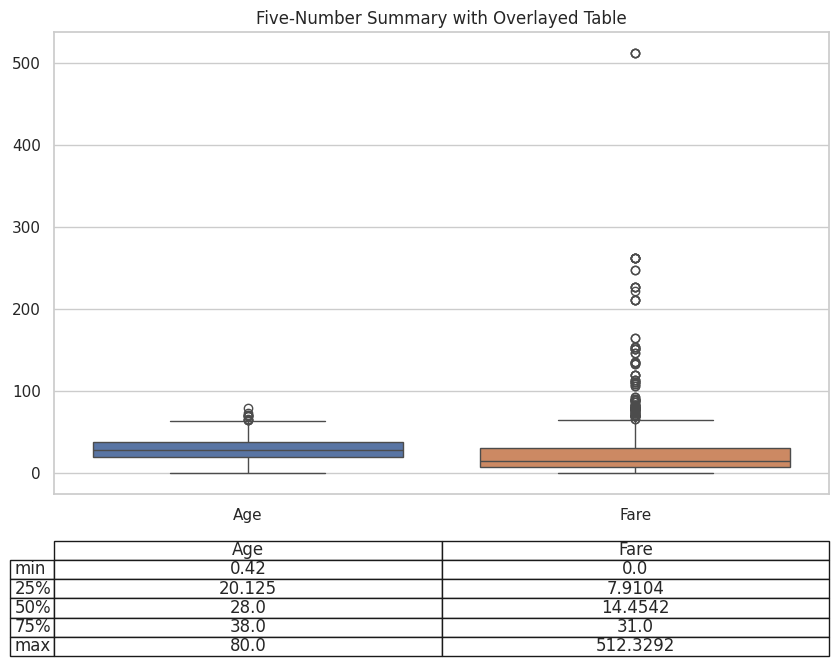

In [ ]:
# Show five-number summary as a table below the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df[numerical_cols])
plt.title("Five-Number Summary with Overlayed Table")

# Overlay the summary table
plt.table(cellText=five_number_summary.values, colLabels=five_number_summary.columns, rowLabels=five_number_summary.index,
          cellLoc="center", loc="bottom", bbox=[0, -0.35, 1, 0.25])

plt.show()


- Let's use the Wine Quality dataset to calculate and visualize the five-number summary for some of its numerical features, such as **fixed acidity**, **volatile acidity**, **citric acid**, and **alcohol**.

In [ ]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, delimiter=';')

# Display the first few rows of the dataset
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Select numerical columns for five-number summary
numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol']

# Calculate five-number summary
five_number_summary = wine_df[numerical_cols].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print(five_number_summary)


     fixed acidity  volatile acidity  citric acid  alcohol
min            4.6              0.12         0.00      8.4
25%            7.1              0.39         0.09      9.5
50%            7.9              0.52         0.26     10.2
75%            9.2              0.64         0.42     11.1
max           15.9              1.58         1.00     14.9


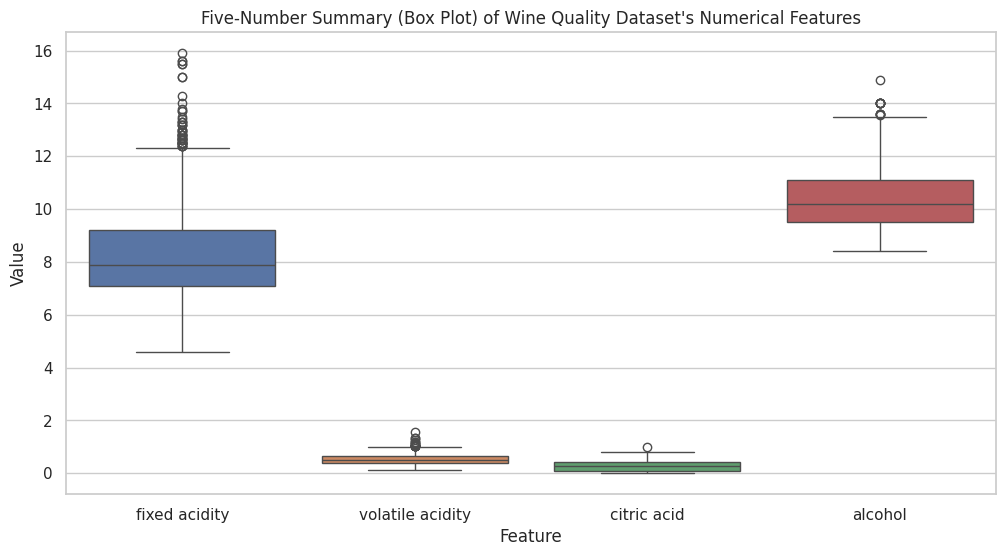

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(12, 6))

# Create box plots for each numerical column
sns.boxplot(data=wine_df[numerical_cols])

# Add labels and title
plt.title("Five-Number Summary (Box Plot) of Wine Quality Dataset's Numerical Features")
plt.ylabel("Value")
plt.xlabel("Feature")

plt.show()


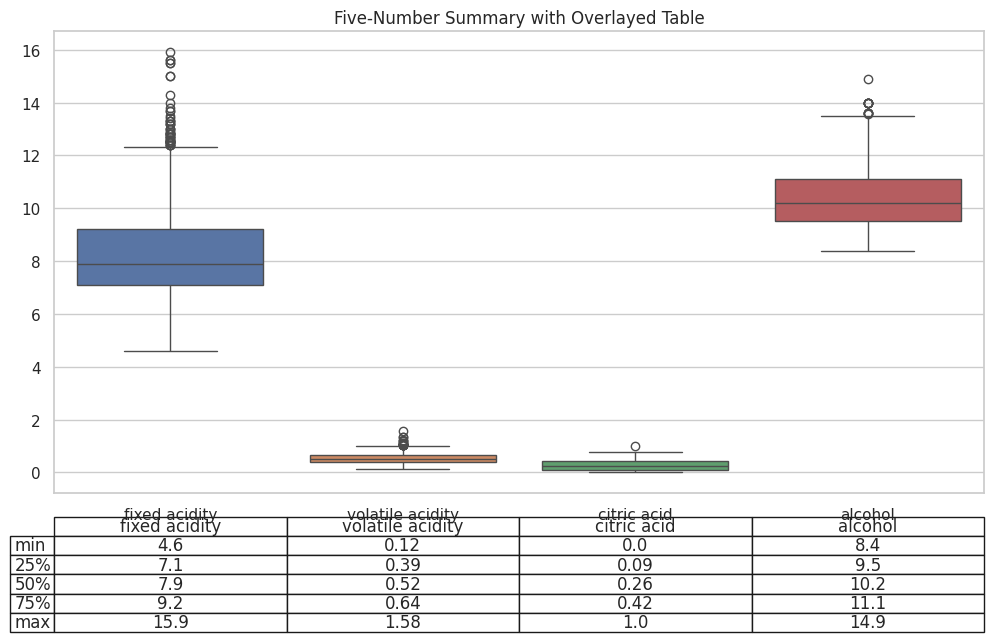

In [ ]:
# Display the five-number summary as a table below the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=wine_df[numerical_cols])
plt.title("Five-Number Summary with Overlayed Table")

# Overlay the summary table
plt.table(cellText=five_number_summary.values, colLabels=five_number_summary.columns, rowLabels=five_number_summary.index,
          cellLoc="center", loc="bottom", bbox=[0, -0.3, 1, 0.25])

plt.show()


Explanation
- Box Plot: For each selected feature, the box plot shows:
    - Minimum and Maximum values at the ends of the whiskers.
    - Q1 and Q3 at the box edges.
    - Median as the line within each box.
    - Outliers as individual points outside the whiskers.